1. 폴더 내 3개 데이터를 불러와 아래와 같이 변환 하시오.
    - 기간은 파일 상단에 적힌 기간월을 작성
    - Column 명 '합계'는 앞에 공백이 존재 ' 합계'
    
    ![Untitled](https://data-station.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F2a570022-4b51-46a3-9808-27bbed895639%2Fbc4354e5-33e3-4b69-9c6e-a56c5737156b%2FUntitled.png?table=block&id=a020bfc2-2a0e-42f3-b1b0-51357b3883cb&spaceId=2a570022-4b51-46a3-9808-27bbed895639&width=2000&userId=&cache=v2)
    
2. '지점' 중 '판매량'의 합이 가장 높은 2개 지점을 확인하시오.
3. 앞서 확인한, 2개의 지점의 '판매량'에 대해 각각 정규성 검정을 수행하고, 결론을 작성하시오.
4. 앞서 확인한, 2개의 지점의 '판매량'의 대표값(중앙값)의 차이를 계산하고자 한다. 가설을 수립하고, Rank Sum Test를 이용해 가설검정을 수행하시오 .
5. '상품명'에 '마스크'와'휴지' 제품을 나누어 분석하고자 한다. 상품명을 '휴지'와 '마스크'로 분류한 뒤, (나머지는 '기타') '상품분류'라는 파생변수를 만들어, 두 상품의 '판매량'의 대표값의 차이를 가설 검정 하시오.
6. 한 회사의 제품 불량률이 10%일 때, 30개의 제품을 검사했을 때 5개 이상의 불량품이 나올 확률을 계산하세요.
7. 어느 고객센터에 하루 평균 3번의 문의가 온다고 할 때, 하루에 문의가 5번 이상 올 확률을 계산하세요.
8. '01_Data.csv' 파일의 'Amount_Month' 데이터를 표준화하여 표준 정규 분포로 변환한 후, 그래프를 그리세요.

In [1]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.descriptivestats as statsd

In [2]:
#1. 폴더 내 3개 데이터를 불러와 아래와 같이 변환 하시오.
#    - 기간은 파일 상단에 적힌 기간월을 작성
#    - Column 명 '합계'는 앞에 공백이 존재 ' 합계'

box = []
for i in range(6,9):
    df = pd.read_excel(f"실습 파일/07_ERP1/기간별상품매출현황_20230{i}.xlsx", header=2)
    df = df.iloc[2:]
    df = pd.melt(df, id_vars=['순번','상품코드','상품명',' 합계'],var_name='지점',value_name='판매량')
    df['기간'] = f'{i}월'
    box.append(df)
    
df = pd.concat(box)

In [3]:
# 2. '지점' 중 '판매량'의 합이 가장 높은 2개 지점을 확인하시오.
df['상품코드'] = df['상품코드'].astype("str")
df['순번'] = df['순번'].astype("int")
df['판매량']=df['판매량'].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236998 entries, 0 to 84759
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   순번      236998 non-null  int32 
 1   상품코드    236998 non-null  object
 2   상품명     236998 non-null  object
 3    합계     236998 non-null  object
 4   지점      236998 non-null  object
 5   판매량     236998 non-null  int32 
 6   기간      236998 non-null  object
dtypes: int32(2), object(5)
memory usage: 12.7+ MB


In [4]:
df.groupby('지점')['판매량'].sum().sort_values(ascending=False).head(2)

지점
(610)부천점    67612
(600)안양점    62987
Name: 판매량, dtype: int32

In [5]:
# 3. 앞서 확인한, 2개의 지점의 '판매량'에 대해 각각 정규성 검정을 수행하고, 결론을 작성하시오.
sample1 = df[df['지점']=='(610)부천점']['판매량']
sample2 = df[df['지점']=='(600)안양점']['판매량']

stats.normaltest(sample1), stats.normaltest(sample2)

(NormaltestResult(statistic=392.59371327162387, pvalue=5.6151110292193245e-86),
 NormaltestResult(statistic=291.630042482356, pvalue=4.71347161815466e-64))

- 귀무가설 : 각 각의 지점의 판매량은 정규성을 따른다.
- 대립가설 : 각 각의 지점의 판매량은 정규성을 따르지 않는다.

두 지점 모두, p값이 0.05 이하로, 귀무가설을 기각하므로, 각 지점의 판매량은 정규성을 따르지 않는다.

In [6]:
# 4. 앞서 확인한, 2개의 지점의 '판매량'의 대표값(중앙값)의 차이를 계산하고자 한다. 
# 가설을 수립하고, Rank Sum Test를 이용해 가설검정을 수행하시오 .
stats.ranksums(sample1, sample2)

RanksumsResult(statistic=0.23404972309949237, pvalue=0.8149463770358858)

- 귀무가설 : 두 지점의 판매량의 중앙값은 차이가 없다.
- 대립가설 : 두 지점의 판매량의 중앙값은 차이가 있다.

ranksum 결과, p 값은 0.81로, 귀무가설을 채택하므로, 두 지점의 판매량의 중앙값은 통계적으로 유의미한 차이가 없당

In [7]:
# 5. '상품명'에 '마스크'와'휴지' 제품을 나누어 분석하고자 한다. 
# 상품명을 '휴지'와 '마스크'로 분류한 뒤, (나머지는 '기타') 
#'상품분류'라는 파생변수를 만들어, 두 상품의 '판매량'의 대표값의 차이를 가설 검정 하시오.
def classify(x):
    if "휴지" in x or "롤" in x:
        return "휴지"
    elif "마스크" in x:
        return "마스크"
    return "기타"

df['상품분류']=df['상품명'].apply(classify)

In [43]:
idx = list(set(df[df['상품명'].str.contains('롤')].index) - set(df[df['상품명'].str.contains('휴지')].index))

df['상품명'].iloc[idx]

32772        [숨]100%천연펄프화장지_30롤
32773            [한예지]25m_90롤세트
65546        [숨]100%천연펄프화장지_90롤
65548            [한예지]25m_90롤세트
32781    비타민C 샤워 필터 4종 + 샤워기 세트
                  ...          
65503    [욕실퍼펙트클린]포밍트리플액션10종풀세트
32741         [빨래엔피죤]프리미엄액츠세탁세제
32743       [단품]블루나나우비데물티슈10팩세트
65514        [빨래엔피죤]액츠세제2.7리터1통
32754     [딥슬립]라디언스라디샤인발열매트_Q+Q
Name: 상품명, Length: 6751, dtype: object

In [16]:
sample1 = df[df['상품분류']=='휴지']['판매량']
sample2 = df[df['상품분류']=='마스크']['판매량']

stats.normaltest(sample1), stats.normaltest(sample2)
# 두 집단 모두 H0를 기각하므로, 두 집단은 각각 정규성을 따르지 않는다

(NormaltestResult(statistic=30664.231154107765, pvalue=0.0),
 NormaltestResult(statistic=31820.563309226873, pvalue=0.0))

In [24]:
# 두 독립적인 표본 간 중앙값 차이 비교
# 윌콕슨 순위합 검정 : 정규성을 따르지 않고, 표본 크기가 작을 때
# 맨 - 휘트니 U검정 : 정규성을 따르지 않고, 표본 크기가 작을 때
stats.mannwhitneyu(sample1, sample2)

MannwhitneyuResult(statistic=67647.5, pvalue=0.7965596730237445)

In [25]:
stats.ranksums(sample1, sample2)

RanksumsResult(statistic=0.23404972309949237, pvalue=0.8149463770358858)

- 귀무가설 : 두 지점의 판매량의 중앙값은 차이가 없다.
- 대립가설 : 두 지점의 판매량의 중앙값은 차이가 있다.

ranksum 결과, p 값은 0.05이하로, 귀무가설을 기각하므로, 두 지점의 판매량의 중앙값은 차이가 있다고 본다.

In [26]:
# 6. 한 회사의 제품 불량률이 10%일 때, 30개의 제품을 검사했을 때 5개 이상의 불량품이 나올 확률을 계산하세요.
from scipy.special import  comb

p = 0.1
ans = 0

for n in range(0,5):
    a = comb(30,n)*((p)**n)*((1-p)**(30-n))
    ans+=a
    
1-ans

0.17549487903389427

In [30]:
# pmf : 확률질량함수
# cdf : 누적분포함수

ans = 0
for n in range(0,5):
    ans += stats.binom.pmf(n,30,0.1)

1-ans , 1-stats.binom.cdf(4,30,0.1)

(0.17549487903389527, 0.17549487903389516)

In [49]:
p = 0.1
n = 30
ans = 0

for n in range(5,n+1):
    a = comb(30,n)*((p)**n)*((1-p)**(30-n))
    ans+=a
    
ans

0.17549487903389513

In [35]:
# 7. 어느 고객센터에 하루 평균 3번의 문의가 온다고 할 때, 하루에 문의가 5번 이상 올 확률을 계산하세요.
lamb = 3
time = 1
target = 5
ans = 0

for n in range(0,target):
    a = stats.poisson.pmf(n, lamb*time)
    ans+=a
    
1-ans

0.18473675547622792

In [31]:
1-stats.poisson.cdf(4,3)

0.1847367554762278

In [33]:
# 8. '01_Data.csv' 파일의 'Amount_Month' 데이터를 표준화하여 표준 정규 분포로 변환한 후, 그래프를 그리세요.
df2 = pd.read_csv("실습 파일/01_Data.csv")['Amount_Month']
df2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 51301 entries, 0 to 51300
Series name: Amount_Month
Non-Null Count  Dtype
--------------  -----
51301 non-null  int64
dtypes: int64(1)
memory usage: 400.9 KB


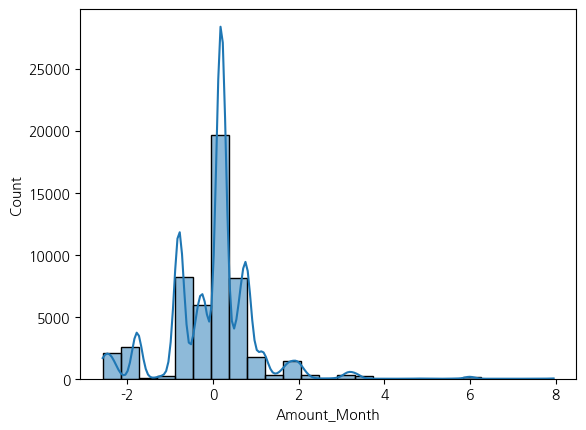

In [36]:
z = (df2-df2.mean())/df2.std()
sns.histplot(z, bins = 25, kde=True)
plt.show()